<a href="https://colab.research.google.com/github/siro844/Machine_Learning/blob/main/UpperConfidenceBound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Importing the dataset

In [4]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing UCB

In [13]:
import math
N=10000
d=10
ads_selected=[]
number_of_selection=[0]*d
sums_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if number_of_selection[i]>0:
      avg_reward=sums_of_rewards[i]/number_of_selection[i]
      delta_i=math.sqrt(3/2* math.log(n+1)/number_of_selection[i])
      upper_bound=avg_reward+delta_i
    else:
      upper_bound=1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound=upper_bound
      ad=i
  ads_selected.append(ad)
  number_of_selection[ad]+=1
  reward=dataset.values[n,ad]
  sums_of_rewards[ad]=sums_of_rewards[ad]+reward
  total_reward=total_reward+reward

Visualizing

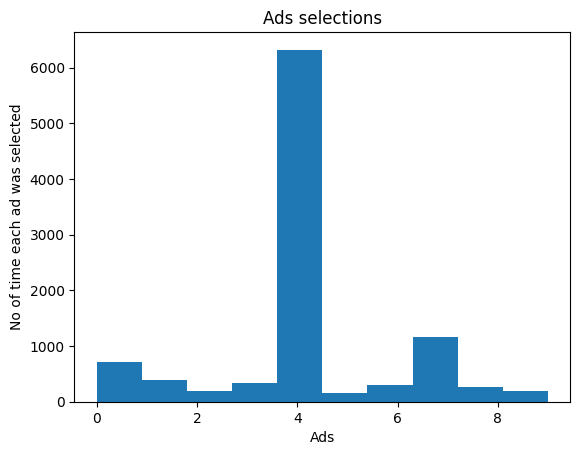

In [14]:
plt.hist(ads_selected)
plt.title('Ads selections')
plt.xlabel('Ads')
plt.ylabel('No of time each ad was selected')
plt.show()